A quick code to run an A/B testing where the variation made in test B is hypothetically leading a higher conversion rate than test A.                                                                             

A/B testing is also known as split testing - it's a process of showing two variants of the same web page to          different segments of website visitors at the same time and comparing which variant drives more conversions.       
 

In [1]:
# Libraries and modules that you are going to use for the A/B testing analysis
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Creating few functions that you are going to use in the analysis
def normal_pdf(x, mu=0, sigma=1):
    """Defining a function that returns to a PDF normal distribution"""
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

In [3]:
def normal_cdf(x, mu=0,sigma=1):
    """Defining a function that returns to the CDF normal distribution"""
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [4]:
def estimated_parameters(N, n): 
    """Defining a function that returns to the probability given n(# of successes) and N(total # of visitors), 
    and its standar deviation(sigma)"""
    p=n/N
    sigma = math.sqrt(p * (1 - p) / N) 
    return p, sigma

In [5]:
def a_b_test_statistic(N_A, n_A, N_B, n_B):
    """Defining a function that returns to the z-score of two proportions- The z-score test for two population 
    proportions is used when you want to know whether two groups (visitors A and visitors B) differ significantly
    on some single characteristic (conversion rate)"""
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2) 

In [6]:
def normal_probability_above(lo, mu=0, sigma=1): 
    """Defining a function that returns to the probability above a certain threshold""" # In this case the threshold is the z-score 
    return 1 - normal_cdf(lo, mu, sigma)

In [7]:
def one_sided_p_value(x, mu=0, sigma=1): 
    """Defining a function that returns to one side p-value""" 
    #  You are using the one sided test because you are giving a direction - test_B >(must be greater than) test_A
    if x >= mu:
           # if x is greater than the mean, the tail is what's greater than x
        return normal_probability_above(x, mu, sigma) 
    else:
           # if x is less than the mean, the tail is what's less than x
        return  normal_cdf(x, mu, sigma)

In [8]:
# Data provided - You can change the data based off the given data
visitors_a = 1860
conversion_a = 250
visitors_b = 1750
conversion_b = 290

In [9]:
# Starting the Analysis - Defining the hypothesis
print(f"Your hypotesis states that the change or variation made in test B leads a higher conversion rate than "
      f"test A.\nIndicating that CR_A is the conversion rate of A and CR_B the conversion rate of B, your null "
      f"and alternative hypothesis are:\n"
      f"- Ho : CR_B <= CR_B\n"
      f"- Ha : CR_B > CR_A\n")

Your hypotesis states that the change or variation made in test B leads a higher conversion rate than test A.
Indicating that CR_A is the conversion rate of A and CR_B the conversion rate of B, your null and alternative hypothesis are:
- Ho : CR_B <= CR_B
- Ha : CR_B > CR_A



In [10]:
# Defining Conversion Rate A, Conversion Rate B, lift conversion rate and the z-score.
CR_A = conversion_a / visitors_a
CR_B = conversion_b / visitors_b
conversion_rate_lift = (conversion_b - conversion_a) / conversion_a     # To understand the impact of the change
z = a_b_test_statistic(visitors_a, conversion_a, visitors_b, conversion_b)                            # z-score

In [11]:
# Creating a table with # of visitors - total conversions - Click Through Rate 
data_frame_A = pd.DataFrame({"N° of visitors": visitors_a,"Total conversions":conversion_a,
                             "CTR":str(round((CR_A),2))+"%"},  index=list("A"))
data_frame_B = pd.DataFrame({"N° of visitors": visitors_b,"Total conversions":conversion_b,
                             "CTR":str(round((CR_B),2))+"%"},  index=list("B"))
frames_A_B = data_frame_A, data_frame_B
table_A_B_test = pd.concat(frames_A_B)
print(f"{table_A_B_test}\n")

   N° of visitors  Total conversions    CTR
A            1860                250  0.13%
B            1750                290  0.17%



In [12]:
# Showing z-score and p-value
print(f"The z score is: {round(z,2)}")
print(f"The p-value is: {round(one_sided_p_value(z),3)}") 
print(f"The conversion rate lift of B is {round(conversion_rate_lift*100,2)} % higher than A conversion rate")

The z score is: 2.63
The p-value is: 0.004
The conversion rate lift of B is 16.0 % higher than A conversion rate


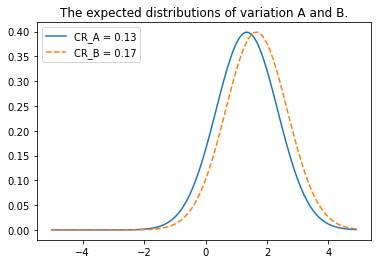

In [13]:
# Running the Analysis and deducting the conclusions.
# Distributions Graph
xs = [x / 10.0 for x in range(-50, 50)] # If you can't see properly the distributions graph reduce the divisor - ex. x / 5.0 
plt.plot(xs,[normal_pdf(x-((CR_A)*10),sigma=1) for x in xs],
                 "-",label="CR_A = "+str(round((CR_A),2)))
plt.plot(xs,[normal_pdf(x-((CR_B)*10),sigma=1) for x in xs],
                 "--",label="CR_B = "+str(round((CR_B),2)))
plt.legend()
plt.title("The expected distributions of variation A and B.")
plt.show()

In [14]:
# Evidences and conclusions
if one_sided_p_value(z) < 0.05 and (CR_B) > (CR_A):  
    # P-value has to be greater than 0.05 beacuse you want to be 95% confident about the result
      print(f"You reject the Null Hypothesis - Conversion rate A is bigger or equal than B, and you accept "
            f"Ha hypothesis - The change or variation made in test B leads a higher conversion rate than test A.\n"
            f"More specificly, Variation B's observed conversion rate ({round(((CR_B)*100),2)}%) "  
            f"is {round((conversion_rate_lift*100),2)}% higher "
            f"than variation A's conversion rate ({round(((CR_A)*100),2)}%).\n"
            f"You can be 95% confident that this "
            f"result is a consequence of the changes you made and not a result of random chance.")
else:
      print(f"You have to accept the Null Hypothesis (Ho) - Conversion rate A is bigger or equal than B. " 
            f"The reasons could be that:\n- Observed difference in conversion "
            f"rate isn't big enough to declare a significant winner(p_value > 0.05).\n"
            f"- There is no real difference in performance between A and B.\n")

You reject the Null Hypothesis - Conversion rate A is bigger or equal than B, and you accept Ha hypothesis - The change or variation made in test B leads a higher conversion rate than test A.
More specificly, Variation B's observed conversion rate (16.57%) is 16.0% higher than variation A's conversion rate (13.44%).
You can be 95% confident that this result is a consequence of the changes you made and not a result of random chance.
